In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df=pd.read_csv("airline_passengers.csv",parse_dates=True,index_col=0)

In [45]:
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Model Building

In [46]:
train_data=df.iloc[:108]
test_data=df.iloc[108:]

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],
                    trend='mul',
                    seasonal='mul',
                    seasonal_periods=12).fit()

In [49]:
test_predictions=fitted_model.forecast(36)

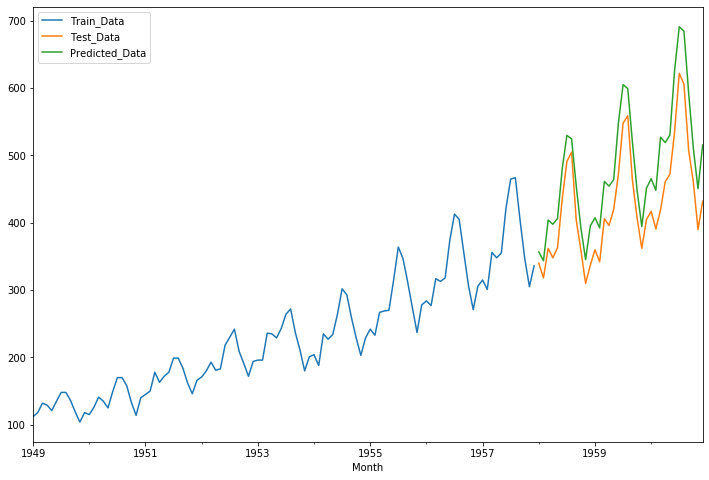

In [50]:
train_data["Thousands of Passengers"].plot(legend=True,label="Train_Data",figsize=(12,8))
test_data["Thousands of Passengers"].plot(legend=True,label="Test_Data",figsize=(12,8))
test_predictions.plot(legend=True,label="Predicted_Data",figsize=(12,8))

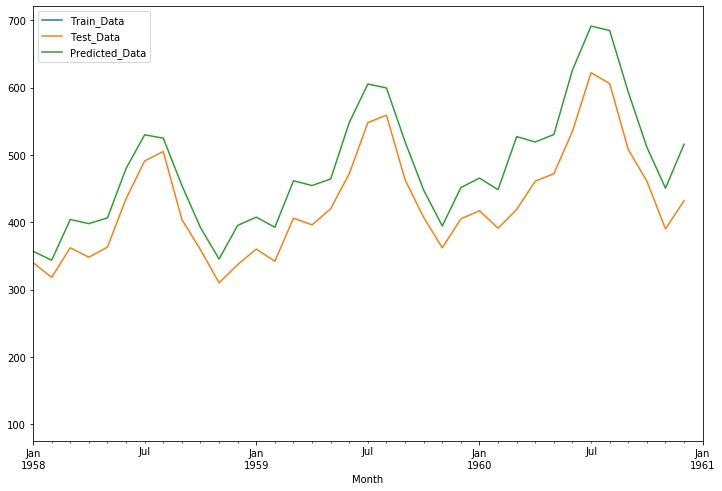

In [51]:
train_data["Thousands of Passengers"].plot(legend=True,label="Train_Data",figsize=(12,8))
test_data["Thousands of Passengers"].plot(legend=True,label="Test_Data",figsize=(12,8))
test_predictions.plot(legend=True,label="Predicted_Data",figsize=(12,8),xlim=['1958-01-01','1961-01-01'])

# Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
np.sqrt(mean_squared_error(test_data,test_predictions))
# This is less than standard deviation in test data. Hece can be accepted

56.57369924189449

In [54]:
mean_absolute_error(test_data,test_predictions)

53.16361991340851

In [56]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


# Forecast using entire data

In [59]:
Final_model=ExponentialSmoothing(df['Thousands of Passengers'],
                    trend='mul',
                    seasonal='mul',
                    seasonal_periods=12).fit()

In [60]:
forecast_prediction=Final_model.forecast(36)

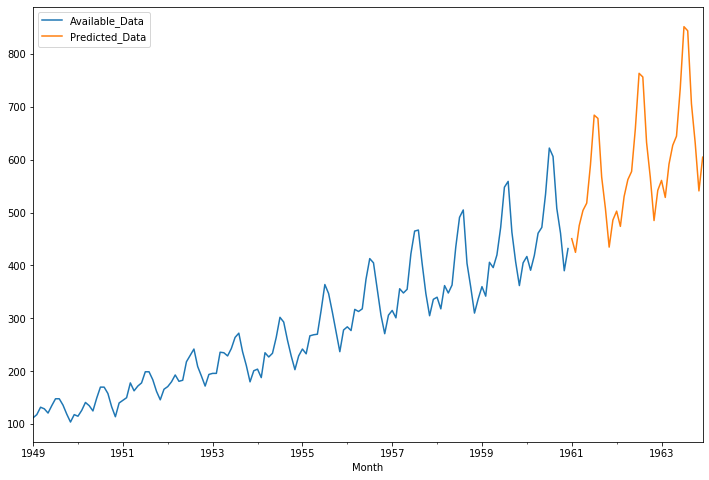

In [61]:
df["Thousands of Passengers"].plot(legend=True,label="Available_Data",figsize=(12,8))
forecast_prediction.plot(legend=True,label="Predicted_Data",figsize=(12,8))